In [20]:
%run init.ipynb

# Simulation of non-selective von Neumann measurements on a quantum computer (QC)

## Kraus' representation
For an initial state $\rho_{0}^{S}\otimes|0\rangle_{A}\langle 0|$ for system + ancilla and a unitary evolution $U_{SA}$, one can obtain the operator sum representation
\begin{align}
\rho^{S} &= Tr_{A}(U_{SA}\rho_{0}^{S}\otimes|0\rangle_{A}\langle 0|U_{SA}^{\dagger}) = \sum_{k}E_{k}\rho_{0}^{S}E_{k}^{\dagger},
\end{align}
where $E_{k}$ are the Kraus' operators with ${}_{S}\langle m|E_{k}|n\rangle_{S}={}_{S}\langle m|\otimes{}_{A}\langle k|U_{SA}|n\rangle_{S}\otimes|0\rangle_{A}.$ Besides, this representation can be obtained from the unitary mapping $$U_{SA}|\psi\rangle_{S}\otimes|0\rangle_{A} = \sum_{k}E_{k}|\psi\rangle_{S}\otimes|k\rangle_{A}.$$

## Simulation of quantum channels with a QC
Following (http://arxiv.org/abs/1704.05593), let's start from an initial state $$|\Psi_{0}\rangle_{SA}=|\psi\rangle_{S}\otimes|0\rangle_{A},$$ and apply the following sequence of operations:
1. A unitary operation $V$ on the ancillas:
\begin{align}
|\Psi_{1}\rangle_{SA} &= \mathbb{I}_{S}\otimes V_{A}|\psi\rangle_{S}\otimes|0\rangle_{A} = |\psi\rangle_{S}\otimes V_{A}|0\rangle_{A} = |\psi\rangle_{S}\otimes|C_{0}^{V_{A}}\rangle_{A}\\
&= |\psi\rangle_{S}\otimes \sum_{j=0}^{d-1}V_{j,0}^{A}|j\rangle_{A} = \sum_{j=0}^{d-1}V_{j,0}^{A}|\psi\rangle_{S}\otimes|j\rangle_{A},
\end{align}
with $d=2^{n}$. Above we used $(V_{A}|0\rangle_{A})_{j}=\sum_{k=0}^{d-1}V^{A}_{j,k}|0\rangle_{A})_{k}=\sum_{k=0}^{d-1}V^{A}_{j,k}\delta_{0,k}=V^{A}_{j,0}.$ We use the notation $|C_{j}^{M}\rangle$ for the $j$-th column vector of a matrix $M$.

2. A controlled unitary operation $U_{c} = \sum_{j=0}^{d-1}U_{j}^{S}\otimes|j\rangle_{A}\langle j|:$
\begin{align}
|\Psi_{2}\rangle_{SA} &= U_{c}\sum_{j=0}^{d-1}V_{j,0}^{A}|\psi\rangle_{S}\otimes|j\rangle_{A} = \sum_{k=0}^{d-1}U_{k}^{S}\otimes|k\rangle_{A}\langle k|\sum_{j=0}^{d-1}V_{j,0}^{A}|\psi\rangle_{S}\otimes|j\rangle_{A} \\
& = \sum_{k=0}^{d-1}\sum_{j=0}^{d-1}V_{j,0}^{A}U_{k}^{S}|\psi\rangle_{S}\otimes|k\rangle_{A}\langle k|j\rangle_{A} = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes|j\rangle_{A}.
\end{align}
Remark. If all Kraus' operator of a given quantum operation are unitary, then we can stop here.

3. A unitary on the ancillas:
\begin{align}
|\Psi_{2}\rangle_{SA} &= \mathbb{I}_{S}\otimes W_{A}|\Psi_{2}\rangle_{SA} = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes W_{A}|j\rangle_{A} = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes |C_{j}^{W_{A}}\rangle_{A} \\
& = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes \sum_{k=0}^{d-1}W_{k,j}^{A}|k\rangle_{A} = \sum_{k=0}^{d-1}\left(\sum_{j=0}^{d-1}W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S}\right)|\psi\rangle_{S}\otimes |k\rangle_{A} \\
& =: \sum_{k=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\otimes |k\rangle_{A}.
\end{align}
Above we used $(W_{A}|j\rangle_{A})_{k} = \sum_{l=0}^{d-1}W^{A}_{k,l}(|j\rangle_{A})_{l}= \sum_{l=0}^{d-1}W^{A}_{k,l}\delta_{j,l} = W^{A}_{k,j}.$
We also defined the Kraus' operators as linear combinations of the unitary operator $U_{j}^{S}$: $$E_{k}^{S} := \sum_{j=0}^{d-1}W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S}.$$

For this protocol to be valid in general, the unitary opeators $U_{j}^{S}$ appearing in $U_{c}$ must form a basis for the matrix space where $E_{k}$ are defined. If the system $\mathcal{H}_{S}$ has dimension $d_{S}$, then there is $d_{S}^{2}$ basis elements $U_{j}$, i.e., $j=0,\cdots,d_{S}^{2}-1$, and therefore $$d=d_{S}^{2}.$$

Let's verify that the evolution above indeed gives the Kraus' operator sum representation:
\begin{align}
\rho^{S}_{2} &= Tr_{A}|\Psi_{2}\rangle_{SA}\langle\Psi_{2}| = Tr_{A}\sum_{k=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\otimes |k\rangle_{A}\sum_{l=0}^{d-1}\langle\psi|_{S}(E_{l}^{S})^{\dagger}\otimes \langle l|_{A} \\
& = Tr_{A}\sum_{k,l=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\langle\psi|(E_{l}^{S})^{\dagger}\otimes |k\rangle_{A}\langle l| = \sum_{k,l=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\langle\psi|(E_{l}^{S})^{\dagger}\otimes \delta_{l,k} \\
& = \sum_{k=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\langle\psi|(E_{k}^{S})^{\dagger}.
\end{align}
By the linearity of these operations, this results is generalized for any initial state $\rho_{0}^{S}=\sum_{j}p_{j}|\psi_{j}\rangle_{S}\langle\psi_{j}|$ for $\{p_{j}\}$ a probability distribution.

This protocol is illustrated in the figure below.
<img src="fig_channel_sim.png" width="600">

The trace-preserving property follows from:
\begin{align}
\sum_{k=0}^{d-1}(E_{k}^{S})^{\dagger}E_{k}^{S} &= \sum_{k=0}^{d-1}\sum_{j=0}^{d-1}(W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S})^{\dagger}\sum_{l=0}^{d-1}W_{k,l}^{A}V_{j,0}^{A}U_{l}^{S} = \sum_{j,l=0}^{d-1}\sum_{k=0}^{d-1}(W_{k,j}^{A})^{*}W_{k,l}^{A}V_{j,0}^{A}(V_{j,0}^{A})^{*}(U_{j}^{S})^{\dagger}U_{l}^{S} \\
& = \sum_{j,l=0}^{d-1}\sum_{k=0}^{d-1}(W^{\dagger}_{A})_{j,k}W_{k,l}^{A}V_{j,0}^{A}(V_{j,0}^{A})^{*}(U_{j}^{S})^{\dagger}U_{l}^{S} = \sum_{j,l=0}^{d-1}(W^{\dagger}_{A}W_{A})_{j,l}(V_{j,0}^{A})^{*}V_{j,0}^{A}(U_{j}^{S})^{\dagger}U_{l}^{S} \\
& = \sum_{j,l=0}^{d-1}\delta_{j,l}V_{j,0}^{A}(V_{j,0}^{A})^{*}(U_{j}^{S})^{\dagger}U_{l}^{S}  = \sum_{j=0}^{d-1}(V^{\dagger}_{A})_{0,j}V_{j,0}^{A}(U_{j}^{S})^{\dagger}U_{j}^{S} = \sum_{j=0}^{d-1}(V^{\dagger}_{A})_{0,j}V_{j,0}^{A}\mathbb{I}_{S} \\
& = (V^{\dagger}_{A}V_{A})_{0,0}\mathbb{I}_{S} = \mathbb{I}_{S}.
\end{align}

We observe also that for an orthonormal basis of matrices $B_{j}$ we can write any matrix as $$A=\sum_{j}c_{j}B_{j}$$ with $$c_{j}=\langle B_{j}|A\rangle_{HS}=Tr(B_{j}^{\dagger}A).$$

### Example: Phase damping
The Kraus' operators for this channel can be written as 
$$E_{0} = \begin{bmatrix}1&0\\0&\sqrt{1-\lambda}\end{bmatrix},\ E_{1} = \begin{bmatrix}0&0\\0&\sqrt{\lambda}\end{bmatrix}$$ 
with $\lambda\in[0,1].$ For a qubit, we shall use the Pauli matrices to form an orthonormal basis (that are unitary and hermitian): $$\left\{\frac{\sigma_{0}}{\sqrt{2}},\frac{\sigma_{1}}{\sqrt{2}},\frac{\sigma_{2}}{\sqrt{2}},\frac{\sigma_{3}}{\sqrt{2}}\right\}.$$ 

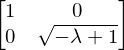

In [2]:
lbda = symbols('lambda', real=True); E0 = Matrix([[1,0],[0,sqrt(1-lbda)]]); E0

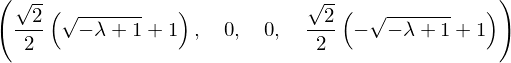

In [3]:
c0 = trace((id(2)/sqrt(2))*E0); c1 = trace((pauli(1)/sqrt(2))*E0)
c2 = trace((pauli(2)/sqrt(2))*E0); c3 = trace((pauli(3)/sqrt(2))*E0)
simplify(c0), simplify(c1), simplify(c2), simplify(c3)

So, we have 
\begin{align}
E_{0} &= c_{0}\frac{\sigma_{0}}{\sqrt{2}} + c_{1}\frac{\sigma_{1}}{\sqrt{2}} + c_{2}\frac{\sigma_{2}}{\sqrt{2}} + c_{3}\frac{\sigma_{3}}{\sqrt{2}} \\
& = \frac{1+\sqrt{1-\lambda}}{\sqrt{2}}\frac{\sigma_{0}}{\sqrt{2}} + 0\frac{\sigma_{1}}{\sqrt{2}} + 0\frac{\sigma_{2}}{\sqrt{2}} + \frac{1-\sqrt{1-\lambda}}{\sqrt{2}}\frac{\sigma_{3}}{\sqrt{2}} \\
& = \frac{1+\sqrt{1-\lambda}}{2}\sigma_{0} + \frac{1-\sqrt{1-\lambda}}{2}\sigma_{3}.
\end{align}

From $E_{k}^{S} := \sum_{j=0}^{d-1}W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S}$ we have 
\begin{align}
E_{0} &= \sum_{j=0}^{3}W_{0,j}^{A}V_{j,0}^{A}U_{j}^{S} = W_{0,0}^{A}V_{0,0}^{A}U_{0}^{S} + W_{0,1}^{A}V_{1,0}^{A}U_{1}^{S} + W_{0,2}^{A}V_{2,0}^{A}U_{2}^{S}+ W_{0,3}^{A}V_{3,0}^{A}U_{3}^{S} \\
&  = W_{0,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{0,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{0,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{0,3}^{A}V_{3,0}^{A}\sigma_{3}.
\end{align}
So, we can set
$$W_{0,0}^{A}=V_{0,0}^{A}=\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}, \ W_{0,3}^{A}=V_{3,0}^{A}=\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}.$$

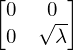

In [4]:
E1 = Matrix([[0,0],[0,sqrt(lbda)]]); E1

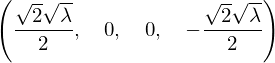

In [5]:
c0 = trace((id(2)/sqrt(2))*E1); c1 = trace((pauli(1)/sqrt(2))*E1)
c2 = trace((pauli(2)/sqrt(2))*E1); c3 = trace((pauli(3)/sqrt(2))*E1)
simplify(c0), simplify(c1), simplify(c2), simplify(c3)

So $$E_{1}= \frac{\sqrt{\lambda}}{2}\sigma_{0} - \frac{\sqrt{\lambda}}{2}\sigma_{3}.$$ As
\begin{align}
E_{1} & = W_{1,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{1,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{1,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{1,3}^{A}V_{3,0}^{A}\sigma_{3}
\end{align}
we see we can set
$$W_{1,0}^{A}=\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}, \ W_{1,3}^{A}=\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}.$$
With this, we get
\begin{align}
V_{A} \doteq \begin{bmatrix} \sqrt{\frac{1+\sqrt{1-\lambda}}{2}} &0&0&\sqrt{\frac{1-\sqrt{1-\lambda}}{2}} \\ 0&1&0&0 \\ 0&0&1&0 \\ \sqrt{\frac{1-\sqrt{1-\lambda}}{2}} &0&0&-\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}\end{bmatrix},\  W_{A} \doteq \begin{bmatrix} 0&1&0&0 \\ \sqrt{\frac{1-\sqrt{1-\lambda}}{2}} &0&0&\sqrt{\frac{1+\sqrt{1-\lambda}}{2}} \\ 0&0&1&0 \\ \sqrt{\frac{1+\sqrt{1-\lambda}}{2}}&0&0&-\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}\end{bmatrix}.
\end{align}

Solving the system of nonlinear equations with Sympy
\begin{equation}
\begin{cases}
|V_{0,0}^{A}|^{2}+|V_{1,0}^{A}|^{2}+|V_{2,0}^{A}|^{2}+|V_{3,0}^{A}|^{2}=1, \\
|W_{0,0}^{A}|^{2}+|W_{0,1}^{A}|^{2}+|W_{0,2}^{A}|^{2}+|W_{0,3}^{A}|^{2}=1, \\
|W_{1,0}^{A}|^{2}+|W_{1,1}^{A}|^{2}+|W_{1,2}^{A}|^{2}+|W_{1,3}^{A}|^{2}=1, \\
(W_{1,0}^{A})^{*}W_{0,0}^{A}+(W_{1,1}^{A})^{*}W_{0,1}^{A}+(W_{1,2}^{A})^{*}W_{0,2}^{A}+(W_{1,3}^{A})^{*}W_{0,3}^{A}=0, \\
W_{0,0}^{A}V_{0,0}^{A} = \frac{1+\sqrt{1-\lambda}}{2}, \ W_{0,1}^{A}V_{1,0}^{A} = 0, \ W_{0,2}^{A}V_{2,0}^{A} = 0, \ W_{0,3}^{A}V_{3,0}^{A} = \frac{1-\sqrt{1-\lambda}}{2}, \\
W_{1,0}^{A}V_{0,0}^{A} = \frac{\sqrt{\lambda}}{2}, \ W_{1,1}^{A}V_{1,0}^{A} = 0, \ W_{1,2}^{A}V_{2,0}^{A} = 0, \ W_{1,3}^{A}V_{3,0}^{A} = -\frac{\sqrt{\lambda}}{2}.
\end{cases}
\end{equation}

In [27]:
V00,V10,V20,V30,W00,W01,W02,W03,W10,W11,W12,W13=symbols('V00 V10 V20 V30 W00 W01 W02 W03 W10 W11 W12 W13',real=True)
#nonlinsolve([V00**2+V10**2+V20**2+V30**2-1, W00**2+W01**2+W02**2+W03**2-1,
#             W10**2+W11**2+W12**2+W13**2-1,W10*W00+W11*W01+W12*W02+W13*W03,
#             W00*V00-(1+sqrt(1-lbda))/2, W01*V10, W02*V20, W03*V30-(1-sqrt(1-lbda))/2,
#             W10*V00-sqrt(lbda)/2, W11*V10, W12*V20, W13*V30+sqrt(lbda)/2],
#            [V00,V10,V20,V30,W00,W01,W02,W03,W10,W11,W12,W13])
# took too long for solving (did not return any result)

#### Verifications

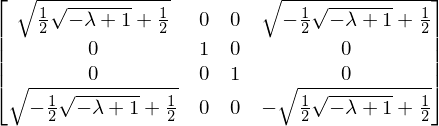

In [7]:
V = Matrix([[sqrt((1+sqrt(1-lbda))/2),0,0,sqrt((1-sqrt(1-lbda))/2)],[0,1,0,0],[0,0,1,0],
            [sqrt((1-sqrt(1-lbda))/2),0,0,-sqrt((1+sqrt(1-lbda))/2)]])
V

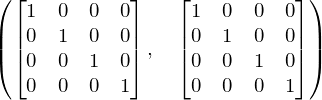

In [8]:
V*V.T, V.T*V # verification of unitarity

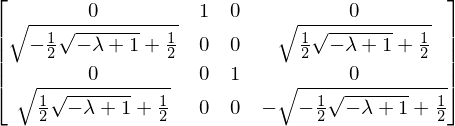

In [9]:
W = Matrix([[0,1,0,0],[sqrt((1-sqrt(1-lbda))/2),0,0,sqrt((1+sqrt(1-lbda))/2)],[0,0,1,0],
            [sqrt((1+sqrt(1-lbda))/2),0,0,-sqrt((1-sqrt(1-lbda))/2)]])
W

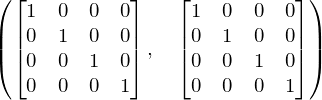

In [10]:
W*W.T, W.T*W # verification of unitarity

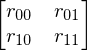

In [41]:
r00,r01,r10,r11 = symbols('r00,r01,r10,r11',real=True); rhoS0 = Matrix([[r00,r01],[r10,r11]])
rhoS0 # initial state

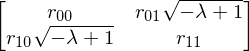

In [12]:
rhoS = E0*rhoS0*E0 + E1*rhoS0*E1; simplify(rhoS) # evolved state using the Kraus' operators

In [13]:
%run ptr.ipynb

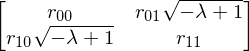

In [14]:
# tests the circuit for the PDC
rhoSA0 = tp(rhoS0,proj(cb(4,0)))#; rhoSA0 
rhoSA1 = tp(id(2),V)*rhoSA0*tp(id(2),V.T)#; rhoSA1
Uc = tp(id(2),proj(cb(4,0))) + tp(id(2),proj(cb(4,1))) + tp(id(2),proj(cb(4,2))) + tp(pauli(3),proj(cb(4,3)))
#Uc*Uc.T, Uc.T*Uc
rhoSA2 = Uc*rhoSA1*Uc.T; #rhoSA2
rhoS = ptraceB(2, 4, rhoSA2); simplify(rhoS) # ok!

#### Alternative: 2-dimensional ancilla
In (http://arxiv.org/abs/1704.05593), instead of the unitary operators above, the authors used
\begin{align}
V_{A} = W_{A} = \begin{bmatrix} \sqrt{\frac{1+\sqrt{1-\lambda}}{2}} &\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}  \\ \sqrt{\frac{1-\sqrt{1-\lambda}}{2}}&-\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}\end{bmatrix}.
\end{align}
Let's verify if it works.

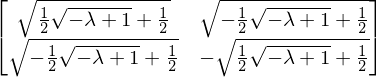

In [15]:
V = Matrix([[sqrt((1+sqrt(1-lbda))/2),sqrt((1-sqrt(1-lbda))/2)],
            [sqrt((1-sqrt(1-lbda))/2),-sqrt((1+sqrt(1-lbda))/2)]])
W = V; V

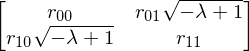

In [16]:
# tests the (http://arxiv.org/abs/1704.05593) circuit
rhoSA0 = tp(rhoS0,proj(cb(2,0))); rhoSA0 
rhoSA1 = tp(id(2),V)*rhoSA0*tp(id(2),V.T); rhoSA1
Uc = tp(id(2),proj(cb(2,0))) + tp(pauli(3),proj(cb(2,1))); Uc, Uc*Uc.T, Uc.T*Uc
rhoSA2 = Uc*rhoSA1*Uc.T; rhoSA2
rhoS = ptraceB(2, 2, rhoSA2); simplify(rhoS) # also works! why?

## Simulating non-selective von Neuman measurements
Let's consider and observable $O$. If, for a system prepared in the state $\rho$, we measure $O$ non-selectively, or in a non-revealing form, the post-measurement state is
$$\Phi_{O}(\rho)=\sum_{j}|o_{j}\rangle\langle o_{j}|\rho|o_{j}\rangle\langle o_{j}|,$$
which is quivalent to the quantum operations described above if we set the Kraus' operator to $$E_{j}=|o_{j}\rangle\langle o_{j}|.$$ 
It's worth observing that these Kraus' operators must satisfy the restrictions $E_{j}E_{k}=E_{j}\delta_{j,k}\ \forall j,k$ and $\sum_{j=0}^{d_{S}}E_{j}=\mathbb{I}_{S}.$

### One qubit systems
In what follows, let's consider the measurent of a general observable $\hat{n}\cdot\vec{\sigma}$ of a qubit. The eigenvectors are
\begin{align}
& |o_{0}\rangle = |n_{+}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& |o_{1}\rangle = |n_{-}\rangle = \sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle.
\end{align}
The associated projectors are
\begin{align}
E_{0} &= |o_{0}\rangle\langle o_{0}| = \big(\cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle\big)\big(\cos(\theta/2)\langle 0| + e^{-i\phi}\sin(\theta/2)\langle 1|\big) \\
& = \cos^{2}(\theta/2)|0\rangle\langle 0| + e^{-i\phi}\sin(\theta/2)\cos(\theta/2)|0\rangle\langle 1| + e^{i\phi}\sin(\theta/2)\cos(\theta/2)|1\rangle\langle 0| + \sin^{2}(\theta/2)|1\rangle\langle 1| \\
& \doteq \begin{bmatrix} \cos^{2}(\theta/2) & e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ e^{i\phi}\sin(\theta/2)\cos(\theta/2) & \sin^{2}(\theta/2) \end{bmatrix}, \\
E_{1} &= |o_{1}\rangle\langle o_{1}| = \big(\sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle\big)\big(\sin(\theta/2)\langle 0| - e^{-i\phi}\cos(\theta/2)\langle 1|\big) \\
& = \sin^{2}(\theta/2)|0\rangle\langle 0| - e^{-i\phi}\sin(\theta/2)\cos(\theta/2)|0\rangle\langle 1| - e^{i\phi}\sin(\theta/2)\cos(\theta/2)|1\rangle\langle 0| + \cos^{2}(\theta/2)|1\rangle\langle 1| \\
& \doteq \begin{bmatrix} \sin^{2}(\theta/2) & -e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ -e^{i\phi}\sin(\theta/2)\cos(\theta/2) & \cos^{2}(\theta/2) \end{bmatrix}.
\end{align}

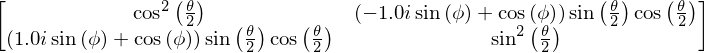

In [42]:
th, ph = symbols('theta phi', real=True) 
E0 = Matrix([[cos(th/2)**2, (cos(ph)-1j*sin(ph))*sin(th/2)*cos(th/2)], 
             [(cos(ph)+1j*sin(ph))*sin(th/2)*cos(th/2),sin(th/2)**2]])
E0

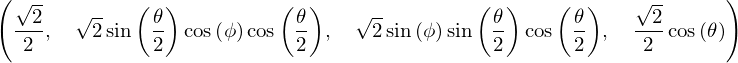

In [18]:
# coefficients for E0
c0 = trace((id(2)/sqrt(2))*E0); c1 = trace((pauli(1)/sqrt(2))*E0)
c2 = trace((pauli(2)/sqrt(2))*E0); c3 = trace((pauli(3)/sqrt(2))*E0)
simplify(c0), factor(c1), factor(c2), simplify(c3)

So
\begin{align}
E_{0} & = \frac{1}{2}\sigma_{0} + \frac{\sin\theta\cos\phi}{2}\sigma_{1} + \frac{\sin\theta\sin\phi}{2}\sigma_{2} +  \frac{\cos\theta}{2}\sigma_{1} \\
& = W_{0,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{0,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{0,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{0,3}^{A}V_{3,0}^{A}\sigma_{3}.
\end{align}

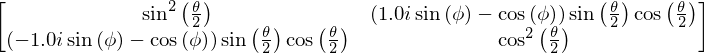

In [19]:
E1 = Matrix([[sin(th/2)**2, -(cos(ph)-1j*sin(ph))*sin(th/2)*cos(th/2)], 
             [-(cos(ph)+1j*sin(ph))*sin(th/2)*cos(th/2),cos(th/2)**2]])
E1

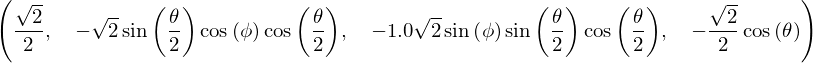

In [20]:
# coefficients for E1
c0 = trace((id(2)/sqrt(2))*E1); c1 = trace((pauli(1)/sqrt(2))*E1)
c2 = trace((pauli(2)/sqrt(2))*E1); c3 = trace((pauli(3)/sqrt(2))*E1)
simplify(c0), factor(c1), factor(c2), simplify(c3)

So
\begin{align}
E_{1} &= \frac{1}{2}\sigma_{0} - \frac{\sin\theta\cos\phi}{2}\sigma_{1} - \frac{\sin\theta\sin\phi}{2}\sigma_{2} -  \frac{\cos\theta}{2}\sigma_{1} \\
& = W_{1,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{1,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{1,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{1,3}^{A}V_{3,0}^{A}\sigma_{3}
\end{align}

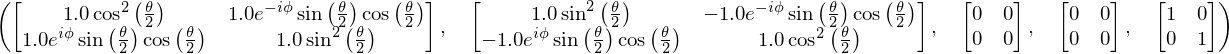

In [27]:
# tests for the properties of the Kraus' operators
simplify(E0*E0), simplify(E1*E1), simplify(E0*E1), simplify(E1*E0), simplify(E0+E1) # ok!

Solving the system of nonlinear equations with Sympy
\begin{equation}
\begin{cases}
|V_{0,0}^{A}|^{2}+|V_{1,0}^{A}|^{2}+|V_{2,0}^{A}|^{2}+|V_{3,0}^{A}|^{2}=1, \\
|W_{0,0}^{A}|^{2}+|W_{0,1}^{A}|^{2}+|W_{0,2}^{A}|^{2}+|W_{0,3}^{A}|^{2}=1, \\
|W_{1,0}^{A}|^{2}+|W_{1,1}^{A}|^{2}+|W_{1,2}^{A}|^{2}+|W_{1,3}^{A}|^{2}=1, \\
(W_{1,0}^{A})^{*}W_{0,0}^{A}+(W_{1,1}^{A})^{*}W_{0,1}^{A}+(W_{1,2}^{A})^{*}W_{0,2}^{A}+(W_{1,3}^{A})^{*}W_{0,3}^{A}=0, \\
W_{0,0}^{A}V_{0,0}^{A} =\frac{1}{2}, \ W_{0,1}^{A}V_{1,0}^{A} = \frac{\sin\theta\cos\phi}{2}, \ W_{0,2}^{A}V_{2,0}^{A} = \frac{\sin\theta\sin\phi}{2}, \ W_{0,3}^{A}V_{3,0}^{A} = \frac{\cos\theta}{2}, \\
W_{1,0}^{A}V_{0,0}^{A} = \frac{1}{2}, \ W_{1,1}^{A}V_{1,0}^{A} = -\frac{\sin\theta\cos\phi}{2}, \ W_{1,2}^{A}V_{2,0}^{A} = -\frac{\sin\theta\sin\phi}{2}, \ W_{1,3}^{A}V_{3,0}^{A} = -\frac{\cos\theta}{2}.
\end{cases}
\end{equation}

In [29]:
#V00 = 1/sqrt(2); W00 = 1/sqrt(2); W10 = 1/sqrt(2) 
#nonlinsolve([V00**2+V10**2+V20**2+V30**2-1, W00**2+W01**2+W02**2+W03**2-1, 
#             W10**2+W11**2+W12**2+W13**2-1, W10*W00+W11*W01+W12*W02+W13*W03,
#             W00*V00-1/2, W01*V10-sin(th)*cos(ph)/2, W02*V20-sin(th)*sin(ph)/2, W03*V30-cos(th)/2, 
#             W10*V00-1/2, W11*V10+sin(th)*cos(ph)/2, W12*V20+sin(th)*sin(ph)/2, W13*V30+cos(th)/2],
#            [V00,V10,V20,V30,W00,W01,W02,W03,W10,W11,W12,W13])

Thus
$$
V_{A} = \begin{bmatrix} 
&  &  &  
\\  &  &  & 
\\  &  &  & 
\\  &  &  & 
\end{bmatrix},
$$
$$
W_{A} = \begin{bmatrix} 
&  &  &  
\\  &  &  & 
\\  &  &  & 
\\  &  &  & 
\end{bmatrix}.
$$

## Controll-NOT-based algorithm for simulating non-revealing von Neumann measurments
Let's consider two qubits prepared in the state $|\Psi_{0}\rangle=|\psi\rangle\otimes|0\rangle$ and apply a $CNOT=|0\rangle\langle 0|\otimes\sigma_{0}+|1\rangle\langle 1|\otimes\sigma_{1}$:
\begin{align}
|\Psi\rangle &= CNOT|\Psi_{0}\rangle = |0\rangle\langle 0||\psi\rangle\otimes\sigma_{0}|0\rangle + |1\rangle\langle 1||\psi\rangle\otimes\sigma_{1}|0\rangle \\
& = \langle 0|\psi\rangle|0\rangle\otimes|0\rangle + \langle 1|\psi\rangle|1\rangle\otimes|1\rangle.
\end{align}
Tracing out the 2nd system:
\begin{align}
Tr_{p}(\Psi) &= |\langle 0|\psi\rangle|^{2}|0\rangle\langle 0| + |\langle 1|\psi\rangle|^{2}|1\rangle\langle 1| \\
&  = \langle 0|\psi\rangle\langle\psi|0\rangle|0\rangle\langle 0| + \langle 1|\psi\rangle\langle\psi|1\rangle|1\rangle\langle 1|  = |0\rangle\langle 0|\psi\rangle\langle\psi|0\rangle\langle 0| + |1\rangle\langle 1|\psi\rangle\langle\psi|1\rangle\langle 1| \\
&= P_{0}|\psi\rangle\langle\psi|P_{0} + P_{1}|\psi\rangle\langle\psi|P_{1} =: \Pi_{0,1}(\psi).
\end{align}
So, the control-NOT can be used to perform a non-selective measurement in the computational basis.

Following, let's consider a general basis
\begin{align}
|n_{0}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle = U|0\rangle, \\
|n_{1}\rangle = -\sin(\theta/2)|0\rangle + e^{i\phi}\cos(\theta/2)|1\rangle = U|1\rangle,
\end{align}
with
\begin{equation}
U_{c\rightarrow g} = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i\phi}\cos(\theta/2) \end{bmatrix} \ \therefore\  U_{c\rightarrow g}^{\dagger} = \begin{bmatrix} \cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -\sin(\theta/2) & e^{-i\phi}\cos(\theta/2) \end{bmatrix}.
\end{equation}

Non-selective measure of the general observable $\hat{n}\cdot\vec{\sigma}$:
\begin{align}
\Pi_{n_{0},n_{1}}(\psi) &= P_{n_{0}}|\psi\rangle\langle\psi|P_{n_{0}}  + P_{n_{1}}|\psi\rangle\langle\psi|P_{n_{1}} \\ 
&= |n_{0}\rangle\langle n_{0}||\psi\rangle\langle\psi||n_{0}\rangle\langle n_{0}|  + |n_{1}\rangle\langle n_{1}||\psi\rangle\langle\psi||n_{1}\rangle\langle n_{1}| \\
&= U|0\rangle\langle 0|U^{\dagger}|\psi\rangle\langle\psi|U|0\rangle\langle 0|U^{\dagger}  + U|1\rangle\langle 1|U^{\dagger}|\psi\rangle\langle\psi|U|1\rangle\langle 1|U^{\dagger} \\
&= U\big(|0\rangle\langle 0||\psi'\rangle\langle\psi'||0\rangle\langle 0|  + |1\rangle\langle 1||\psi'\rangle\langle\psi'||1\rangle\langle 1|\big)U^{\dagger} \\
&= U\Pi_{0,1}(\psi')U^{\dagger},
\end{align}
where we defined $$|\psi'\rangle:=U^{\dagger}|\psi\rangle.$$ So, a non-selective measurement of an arbitrary one-qubit observable may be implemented using the quantum circuit below
<img src='fig_measure_sim.png' width='400'>

IBMQE gates: $U(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}$. We shall also need $U^{\dagger}(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -e^{-i\lambda}\sin(\theta/2) & e^{-i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix} = U(\theta,\pi-\lambda,-\pi-\phi)$

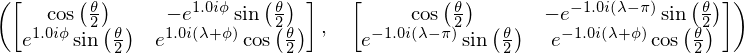

In [29]:
def U(th,ph,lb):
    return Matrix([[cos(th/2),-exp(1j*ph)*sin(th/2)],
                   [exp(1j*ph)*sin(th/2),exp(1j*(ph+lb))*cos(th/2)]])
th,ph,lb = symbols('theta phi lambda', real=True)
U(th,ph,lb), simplify(U(th,pi-lb,-pi-ph)) # ok!

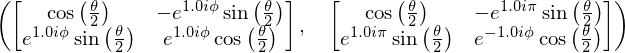

In [30]:
U(th,ph,0), U(th,pi-0,-pi-ph) # ok!

# Implementation on IBMQ
## Representation of $\rho$ in a particular basis $\{|n_{0}\rangle,|n_{1}\rangle\}$

In [50]:
def n_basis(th, ph, t):
    if t == 's':
        ket_n0 = Matrix([[cos(th/2)],[(cos(ph)+1j*sin(ph))*sin(th/2)]])
        bra_n0 = Matrix([[cos(th/2),(cos(ph)-1j*sin(ph))*sin(th/2)]])
        ket_n1 = Matrix([[-sin(th/2)],[(cos(ph)+1j*sin(ph))*cos(th/2)]])
        bra_n1 = Matrix([[-sin(th/2),(cos(ph)-1j*sin(ph))*cos(th/2)]])
    else:
        ket_n0 = np.array([[math.cos(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2)]])
        bra_n0 = np.array([[math.cos(th/2),(math.cos(ph)-1j*math.sin(ph))*math.sin(th/2)]])
        ket_n1 = np.array([[-math.sin(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2)]])
        bra_n1 = np.array([[-math.sin(th/2),(math.cos(ph)-1j*math.sin(ph))*math.cos(th/2)]])
    return ket_n0, bra_n0, ket_n1, bra_n1

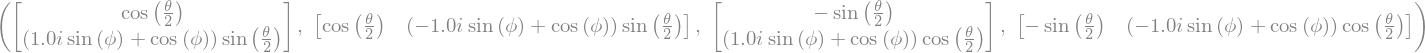

In [52]:
t = 's'
if t == 's':
    th, ph = symbols('theta phi'); ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, t)
else:
    th = math.pi/4; ph = 0; ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, t)
ket_n0, bra_n0, ket_n1, bra_n1

In [74]:
def rho_basis_n(th, ph, rho, t):
    ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, t)
    if t == 's':
        rho_n = Matrix([[bra_n0*rho*ket_n0, bra_n0*rho*ket_n1],[bra_n1*rho*ket_n0, bra_n1*rho*ket_n1]])
    else:
        rho00 = bra_n0.dot(rho.dot(ket_n0)); rho01 = bra_n0.dot(rho.dot(ket_n1))
        rho10 = bra_n1.dot(rho.dot(ket_n0)); rho11 = bra_n1.dot(rho.dot(ket_n1))
        rho_n = np.array([[rho00.item(), rho01.item()],[rho10.item(), rho11.item()]])
    return rho_n

In [77]:
t = 't'
if t == 's':
    th, ph = symbols('theta phi'); rho00,rho01,rho10,rho11 = symbols('r_{00} r_{01} r_{10} r_{11}') 
    rho = Matrix([[rho00,rho01],[rho10,rho11]]); rho_n = rho_basis_n(th, ph, rho, t)
else:
    th = -math.pi/2; ph = 0; rho00,rho01,rho10,rho11 = 1,0,0,0
    rho = np.array([[rho00,rho01],[rho10,rho11]]); rho_n = rho_basis_n(th, ph, rho, t)
rho_n

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

## Functions
von Neumann predictability in relation to the observable $X$: 
$$P_{vn}^{X}(\rho) = \log_{2}(d)-S_{vn}(\Phi_{X}(\rho)).$$ 
We have the equality 
$$P_{vn}^{X}(\rho) = C_{re}^{Y}(\Phi_{X}(\rho)),$$ 
where
$$C_{re}^{Y}(\Phi_{X}(\rho)) = S_{vn}(\Phi_{X}(\rho)_{diag})-S_{vn}(\Phi_{X}(\rho)).$$

In [ ]:
def predict(rho, th, ph):
    

## Implementation

In [8]:
from qiskit import *
import math
import time
import qiskit.quantum_info as qi
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In [32]:
# to enable my IBMQ account 
#%run /Users/jonasmaziero/Dropbox/Research/IBMQ/qiskit/00_load_account.ipynb
%run ptr.ipynb

In [5]:
shots = 8192

In [35]:
qr = QuantumRegister(2)
qc = qiskit.QuantumCircuit(qr) # 2 qr and 2 cr

# State preparation
th1 = math.pi/2; ph1 = math.pi/4; lb1 = math.pi/8 
qc.u(th1,ph1,lb1,0)
# qstate tomography for rho
qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots=shots) # executes the qst
qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
rho01 = qstf_qc.fit(method='lstsq'); rho0 = pTraceR_num(2, 2, rho01); print('rho = ', rho0)

# Non-revealing measurement
th2 = math.pi/4; ph2 = math.pi/2; lb2 = 0 # for U
# Circuit for the non-revealing measure in qr[0]
th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2 # for U^dagger
qc.u(th3,ph3,lb3,0); qc.cx(0,1); qc.u(th2,ph2,lb2,0);
# qstate tomography for rho
qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots=shots) # executes the qst
qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
rho01 = qstf_qc.fit(method='lstsq'); rho0 = pTraceR_num(2, 2, rho01); print('Pi(rho) = ', rho0)

rho =  [[ 0.99882707+0.j         -0.00253656+0.00096294j]
 [-0.00253656-0.00096294j  0.00117293+0.j        ]]
Pi(rho) =  [[7.47373370e-01+0.j         4.89117786e-04-0.00235237j]
 [4.89117786e-04+0.00235237j 2.52626630e-01+0.j        ]]


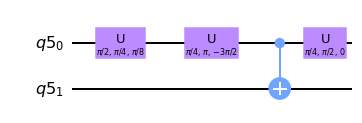

In [27]:
qc.draw(output='mpl')